In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.9.1'

# Veri Önişleme

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True)
training_set = train_datagen.flow_from_directory('veri/training_set',
                                             target_size =(64,64),
                                             batch_size =32,
                                              class_mode = 'binary')



Found 1565 images belonging to 2 classes.


Burada resimler üzerinde kırma işlemi uygulanarak 64x64 boyutuna indirgenir. Burada kullanılan parametreler resim işleme ile ilgili parametreleri ifade eder. Batch size'in büyük olması, daha doğru gradyan değerinin hesaplanmasını sağlamaktadır.

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('veri/test_set',
                                           target_size =(64,64),
                                           batch_size =32,
                                           class_mode ='binary')

Found 448 images belonging to 2 classes.


# CNN Mimarisinin Oluşturulması

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Derleme İşlemi

In [14]:
cnn.compile(optimizer ='adam', loss ='binary_crossentropy',metrics=['accuracy'])

# Eğitim İşlemi

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs= 50)

Epoch 1/50
49/49 [==============================] - 5s 86ms/step - loss: 0.3565 - accuracy: 0.8492 - val_loss: 0.1383 - val_accuracy: 0.9509
Epoch 2/50
49/49 [==============================] - 4s 83ms/step - loss: 0.0580 - accuracy: 0.9872 - val_loss: 0.0245 - val_accuracy: 0.9754
Epoch 3/50
49/49 [==============================] - 4s 82ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/50
49/49 [==============================] - 5s 97ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/50
49/49 [==============================] - 5s 91ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/50
49/49 [==============================] - 4s 85ms/step - loss: 7.7380e-04 - accuracy: 1.0000 - val_loss: 4.7134e-04 - val_accuracy: 1.0000
Epoch 7/50
49/49 [==============================] - 4s 90ms/step - loss: 5.7642e-04 - accuracy: 1.0000 - val_loss: 2.3740e-04 - val_accuracy: 1.00

In [16]:
import pandas as pd

In [17]:
historyData = pd.DataFrame(cnn.history.history)  # Let's take the model's history data to see loss-valueLoss graph

<AxesSubplot:>

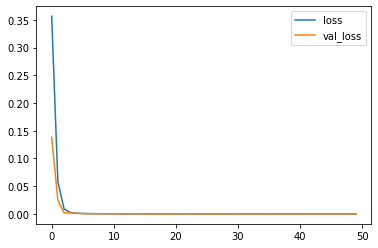

In [18]:
historyData[["loss", "val_loss"]].plot()

# Tahmin Oluşturmak

In [19]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('veri/single_prediction/2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Taş Bitkisi'
else:
    prediction = 'Para Bitkisi'

In [20]:
print(prediction)

Para Bitkisi
